# Carregamento e Importação dos dados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [3]:
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

dados_completos = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)
dados_completos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 9435 non-null   object 
 1   Categoria do Produto    9435 non-null   object 
 2   Preço                   9435 non-null   float64
 3   Frete                   9435 non-null   float64
 4   Data da Compra          9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Local da compra         9435 non-null   object 
 7   Avaliação da compra     9435 non-null   int64  
 8   Tipo de pagamento       9435 non-null   object 
 9   Quantidade de parcelas  9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  Loja                    9435 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 958.4+ KB


#1. Análise do faturamento


In [4]:
faturamento = dados_completos.groupby('Loja')['Preço'].sum().sort_values(ascending=False)
print(faturamento)

Loja
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Preço, dtype: float64


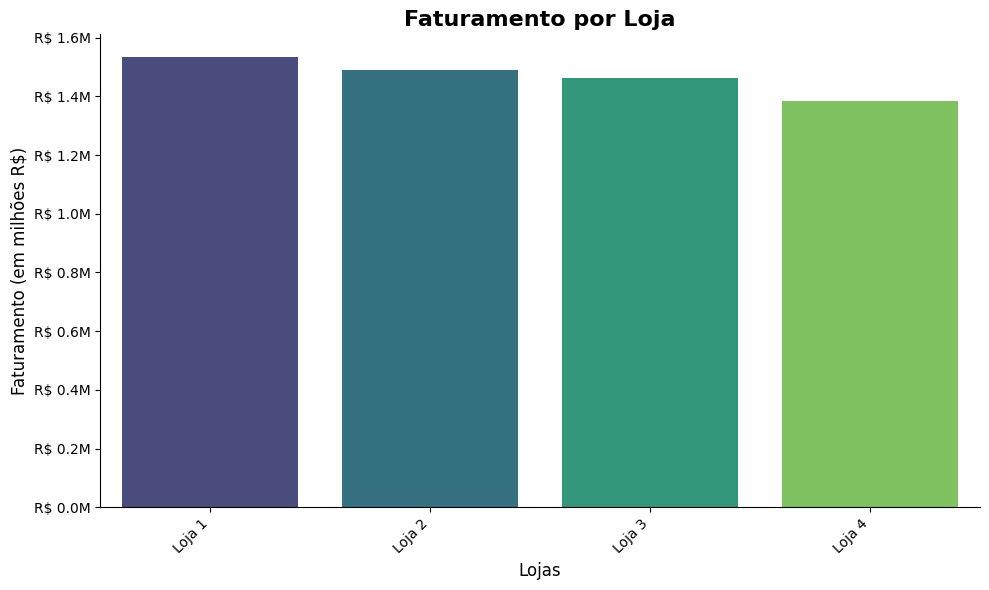

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x=faturamento.index, y=faturamento.values/1e6, hue=faturamento.index, palette='viridis', legend=False)  # Dividindo por 1 milhão
plt.title('Faturamento por Loja', fontsize=16, fontweight='bold')
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Faturamento (em milhões R$)', fontsize=12)  # Atualizando o rótulo do eixo Y
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'R$ {x:,.1f}M'))  # Formatando como milhões
plt.tight_layout()
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
plt.show()

# 2. Vendas por Categoria


In [6]:
vendas_categoria_corrigida = dados_completos.groupby(['Loja', 'Categoria do Produto']).size().reset_index(name='Quantidade de Vendas')
vendas_categoria_corrigida = vendas_categoria_corrigida.sort_values(['Loja', 'Quantidade de Vendas'], ascending=[True, False])

print(vendas_categoria_corrigida)

      Loja   Categoria do Produto  Quantidade de Vendas
6   Loja 1                 moveis                   465
2   Loja 1            eletronicos                   448
0   Loja 1             brinquedos                   324
1   Loja 1       eletrodomesticos                   312
3   Loja 1        esporte e lazer                   284
4   Loja 1  instrumentos musicais                   182
5   Loja 1                 livros                   173
7   Loja 1  utilidades domesticas                   171
14  Loja 2                 moveis                   442
10  Loja 2            eletronicos                   422
8   Loja 2             brinquedos                   313
9   Loja 2       eletrodomesticos                   305
11  Loja 2        esporte e lazer                   275
12  Loja 2  instrumentos musicais                   224
13  Loja 2                 livros                   197
15  Loja 2  utilidades domesticas                   181
22  Loja 3                 moveis               

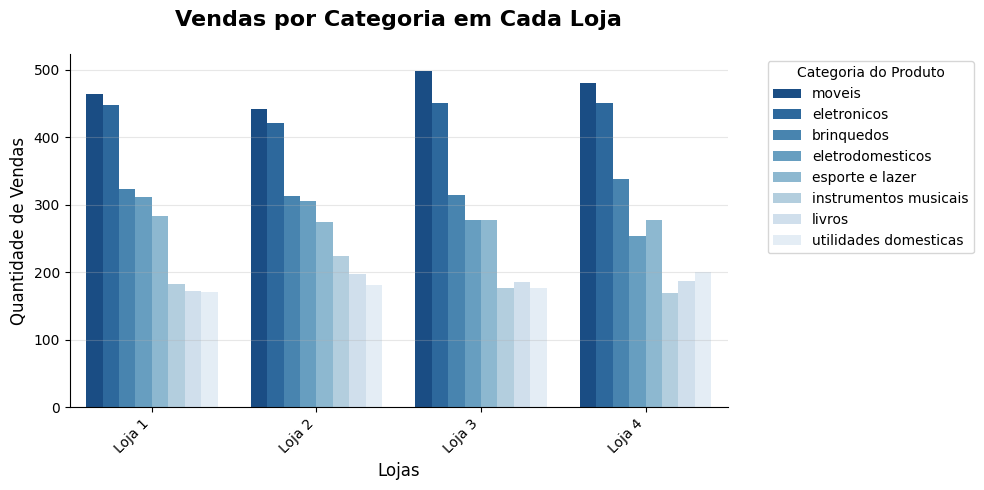

In [25]:
plt.figure(figsize=(10, 5))
sns.barplot(data=vendas_categoria_corrigida, x='Loja', y='Quantidade de Vendas',
            hue='Categoria do Produto', palette='Blues_r')
plt.title('Vendas por Categoria em Cada Loja', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Quantidade de Vendas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Categoria do Produto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
plt.show()

# 3. Média de Avaliação das Lojas

In [8]:
# Média de avaliações
satisfacao = dados_completos.groupby('Loja')['Avaliação da compra'].agg(
    Média='mean',
    Desvio_Padrão='std',
    Total_Avaliações='count'
).round(2).sort_values(by='Média', ascending=False)
print(satisfacao)

        Média  Desvio_Padrão  Total_Avaliações
Loja                                          
Loja 3   4.05           1.39              2359
Loja 2   4.04           1.36              2359
Loja 4   4.00           1.40              2358
Loja 1   3.98           1.42              2359


/tmp/ipython-input-24-1906067987.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('copper')


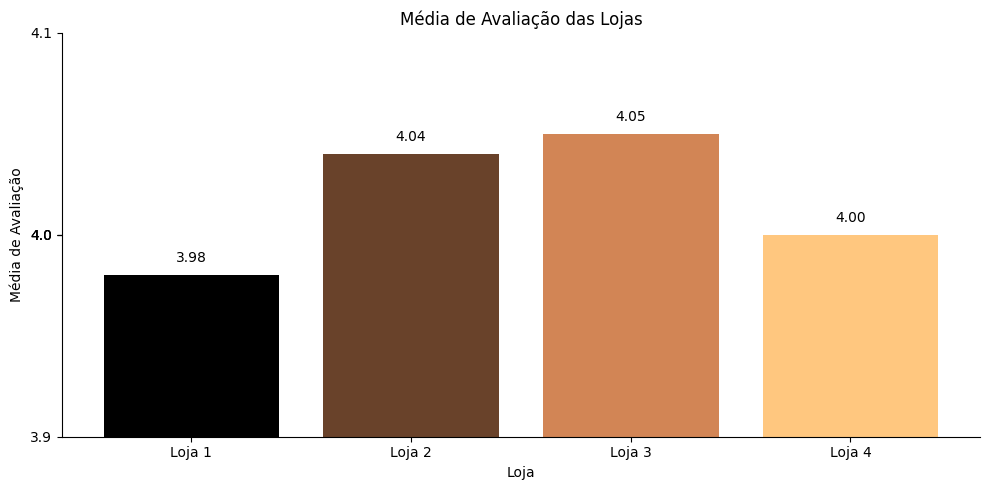

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

medias_avaliacao = {
    'Loja 1': 3.98,
    'Loja 2': 4.04,
    'Loja 3': 4.05,
    'Loja 4': 4.00
}

plt.figure(figsize=(10,5))
cmap = cm.get_cmap('copper')
colors = [cmap(i / (len(medias_avaliacao) - 1)) for i in range(len(medias_avaliacao))]

barra = plt.bar(medias_avaliacao.keys(), medias_avaliacao.values(), color=colors)
plt.title('Média de Avaliação das Lojas')
plt.xlabel('Loja')
plt.ylabel('Média de Avaliação')

# Adicionando os valores em cima de cada barra
for b in barra:
    y = b.get_height()
    plt.text(b.get_x() + b.get_width()/2, y + 0.005, f'{y:.2f}',
             ha='center', va='bottom', fontsize=10)

# Ajuste do eixo Y para 1 casa decimal
plt.yticks(np.round(np.linspace(3.9, 4.1, 5), 1))
plt.ylim(3.9, 4.1)
plt.tight_layout()
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [10]:
top_produtos = dados_completos.groupby(['Loja', 'Produto']).size().groupby('Loja').nlargest(3)
print(top_produtos)

Loja    Loja    Produto                 
Loja 1  Loja 1  Guarda roupas               60
                Micro-ondas                 60
                TV Led UHD 4K               60
Loja 2  Loja 2  Iniciando em programação    65
                Micro-ondas                 62
                Bateria                     61
Loja 3  Loja 3  Kit banquetas               57
                Cama king                   56
                Mesa de jantar              56
Loja 4  Loja 4  Cama box                    62
                Faqueiro                    59
                Cama king                   56
dtype: int64


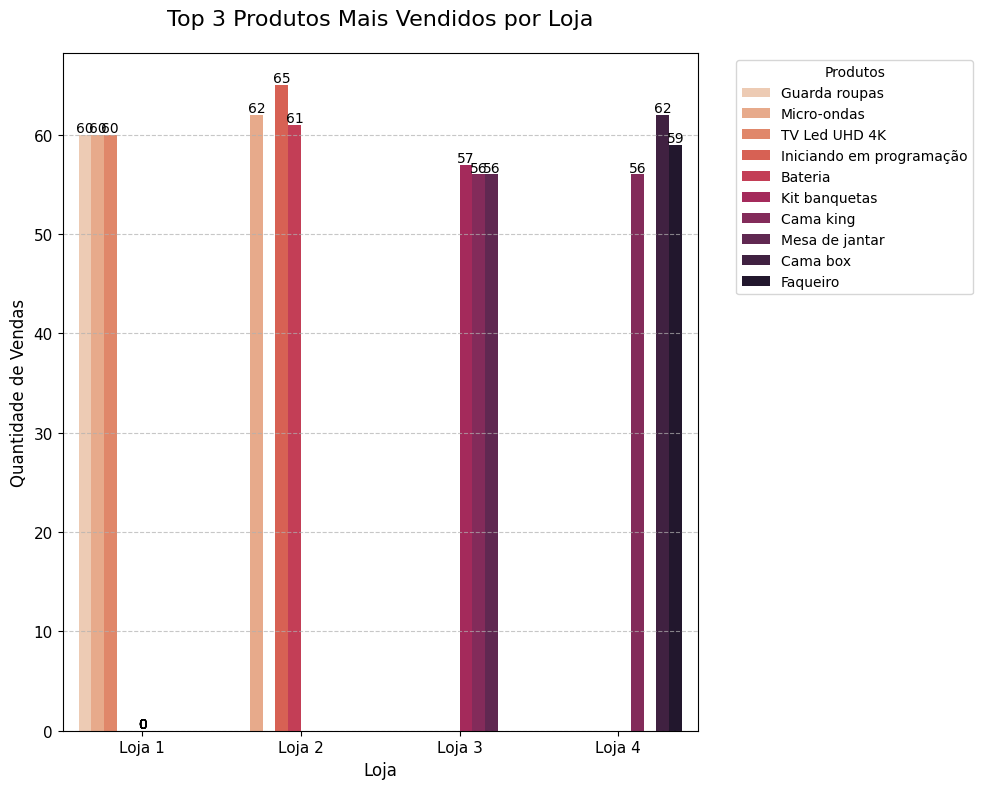

In [23]:
plt.figure(figsize=(10, 8))
top_produtos_df = top_produtos.reset_index(level=1, name='Vendas')

sns.barplot(x='Loja', y='Vendas', hue='Produto', data=top_produtos_df, palette='rocket_r')

plt.title('Top 3 Produtos Mais Vendidos por Loja', fontsize=16, pad=20)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Quantidade de Vendas', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title='Produtos', bbox_to_anchor=(1.05, 1), fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar valores nas barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 5),
                      textcoords='offset points',
                      fontsize=10)

plt.tight_layout()
plt.show()

In [12]:
produtos_menos_vendidos = dados_completos.groupby(['Loja', 'Produto']).size().groupby('Loja').nsmallest(1)
print(produtos_menos_vendidos)

Loja    Loja    Produto          
Loja 1  Loja 1  Celular ABXY         33
Loja 2  Loja 2  Jogo de tabuleiro    32
Loja 3  Loja 3  Blocos de montar     35
Loja 4  Loja 4  Guitarra             33
dtype: int64


/tmp/ipython-input-17-535872409.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


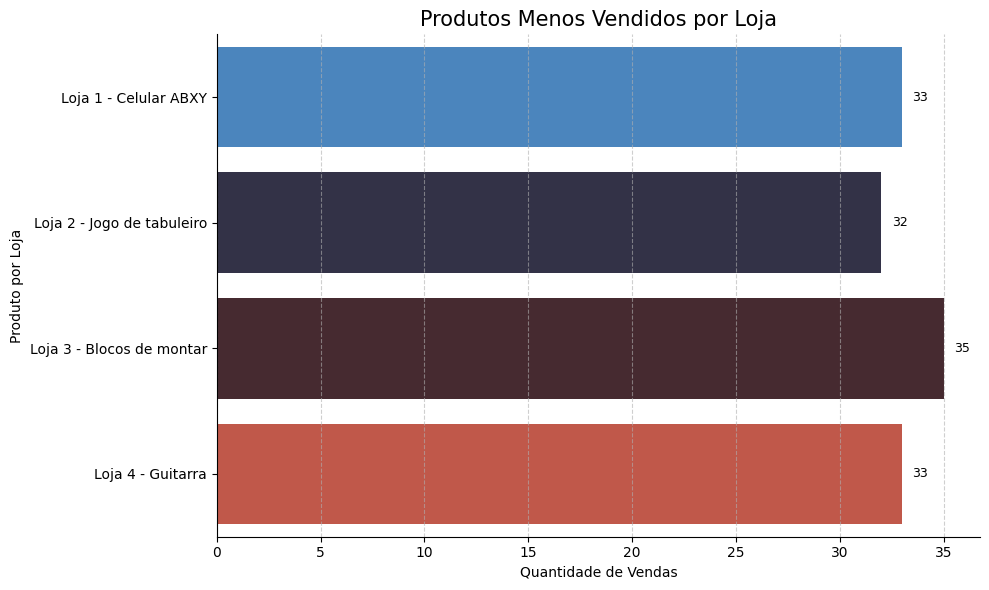

In [17]:
# Convert the Series to a DataFrame without resetting the index initially
df_menos_vendidos = produtos_menos_vendidos.to_frame(name='Vendas')

# Add the index levels as columns, specifying the level number for 'Loja'
df_menos_vendidos['Loja'] = df_menos_vendidos.index.get_level_values(0)
df_menos_vendidos['Produto'] = df_menos_vendidos.index.get_level_values('Produto')

# Reset the index to turn the index into regular columns, and drop the old index
df_menos_vendidos = df_menos_vendidos.reset_index(drop=True)


# Criar uma coluna única com Loja + Produto para exibição clara
df_menos_vendidos['Loja_Produto'] = df_menos_vendidos['Loja'] + ' - ' + df_menos_vendidos['Produto']

# Gráfico de barras horizontais
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_menos_vendidos,
    y='Loja_Produto',
    x='Vendas',
    palette='icefire'
)

plt.title('Produtos Menos Vendidos por Loja', fontsize=15)
plt.xlabel('Quantidade de Vendas')
plt.ylabel('Produto por Loja')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Adicionar os valores nas barras
for bar in plt.gca().patches:
    width = bar.get_width()
    if not pd.isna(width):
        plt.text(width + 0.5, bar.get_y() + bar.get_height() / 2,
                 int(width), va='center', fontsize=9)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


In [14]:
frete_stats = dados_completos.groupby('Loja')['Frete'].agg(['mean', 'median', 'std'])
print(frete_stats)

             mean     median        std
Loja                                   
Loja 1  34.691805  16.498835  43.814183
Loja 2  33.621941  15.406740  42.321932
Loja 3  33.074464  15.879702  41.260516
Loja 4  31.278997  14.614197  40.373136


/tmp/ipython-input-15-4205514119.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=frete_stats, x='Loja', y='mean', palette='vlag')


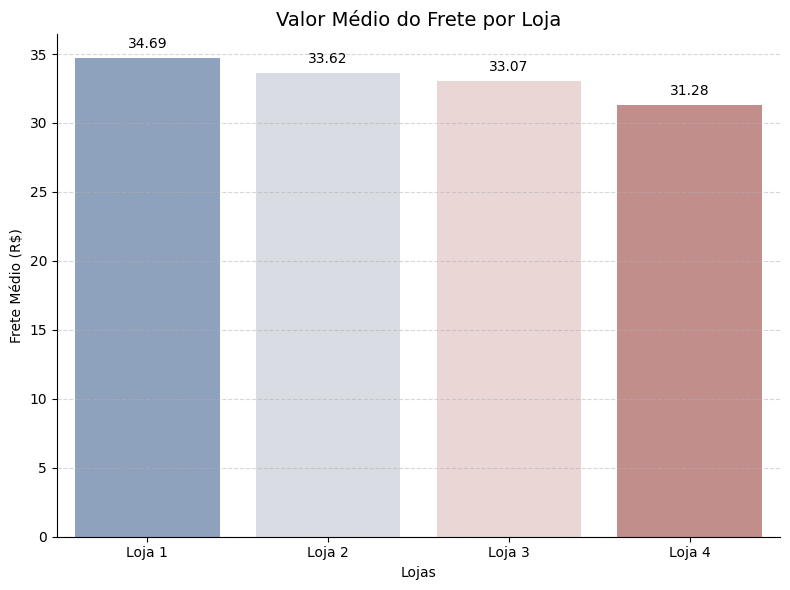

In [15]:
# Plotar gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(data=frete_stats, x='Loja', y='mean', palette='vlag')

plt.title('Valor Médio do Frete por Loja', fontsize=14)
plt.xlabel('Lojas')
plt.ylabel('Frete Médio (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Mostrar valores nas barras
for bar in plt.gca().patches:
    valor = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, valor + 0.5, f'{valor:.2f}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.show()

### 🧾O objetivo desta análise foi comparar o desempenho de quatro unidades da AluraStore para identificar qual delas seria a melhor opção para venda.

Principais Descobertas:

####Faturamento💰:

*   A Loja 1 obteve o maior faturamento (R$ 1,53 milhões)

*   Enquanto a Loja 4 teve a menor receita (R$ 1,38 milhões).


####Satisfação do Cliente🌟:

1.   As avaliações foram boas em todas as unidades (média em torno de 4,0).
2.   A Loja 3 destacou-se com a melhor média (4,05).
3.   Enquanto a Loja 1 teve a menor (3,98).

#### Custo de Frete🚚:

*   A Loja 1 apresentou o maior frete médio (R$ 34,69)

*    a Loja 4, o menor (R$31,28).



####Vendas por Categoria🛒: Móveis e eletrônicos foram os itens mais vendidos em todas as lojas.

####Recomendação Final: Recomenda-se a venda da Loja 1.

###Justificativa:
Embora tenha o maior faturamento, a Loja 1 apresentou os piores indicadores de eficiência e maior risco a longo prazo: menor satisfação dos clientes e o frete mais caro. Esses fatores indicam que sua receita pode não ser sustentável, tornando-a a melhor escolha estratégica para venda.